In [7]:
import geopandas as gpd

import matplotlib.pyplot as plt

In [8]:
gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## geopandas
GeoPandas is a Python library that extends the pandas library by adding support for geospatial data. In this lesson we will introduce the geopandas library to work with vector data. We will also make our first map.

To begin with, let’s import geopandas with its standard abbreviation gpd:

In [9]:
# this is the library we will explore
import geopandas as gpd

# we will start using matplotlib for making maps
import matplotlib.pyplot as plt

## Data
We will use simplified data about wild pig (*Sus Scrofa*) sightings in CA. 
Data is from Global Biodiversity Information Facility (GBIF).

Read in the a shapefile using the `geopandas` function `gpd.read_file()`:

In [10]:
# read the data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`
Core data struture of GeoPandas is `geopandas.GeoDataFrame`
`geopandas.GeoDataFrame` = think of it as a `pandas.GeoDataFrame` with a dedicated geometry column.
The **geometry column** in a `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This column is og type `geopandas.GeoSeries`.
The other non-geometry columns in the geodataframe are our usual pd.Series type.

In [ ]:
# type of pgs dataframe
print(type(pigs))

# type of the geometry column 
print(type(pigs.geometry))

#type of the gbifID column
print(type(pigs.gbifID))

The new data type of the geometry column is also reflected when we look at the data types of the columns in the data frame:

In [18]:
# check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the geom_type attribute of a gpd.GeoDataFrame:

In [11]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Geometric information
Two other important attributes of a gpd.GeoDataFrame are its coordinate reference system (CRS) and its extent.
We can think of the coordinate reference system (CRS) as the instructions to locate each feature in our dataframe on the surface of the Earth. We access the CRS of a gpd.GeoDataFrame using the crs attribute:

In [12]:
# access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the bounding box covering all the features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south and north.

In [17]:
from PIL import Image 
myImage = Image.open("https://carmengg.github.io/eds-220-book/images/lesson-8-geopandas/spatial-extent.png")
myImage.show()

FileNotFoundError: [Errno 2] No such file or directory: 'https://carmengg.github.io/eds-220-book/images/lesson-8-geopandas/spatial-extent.png'

In [16]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

# Data wrangling
Geopandas is built on top of `pandas`, so (almost) everthing we have learned about wrangling pandas data, still applies here

**Example**
We only want to use recent data fro the wild pig observations.

In [20]:
# what years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection

In [24]:
# select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original dataframe
print(len(pigs))

#print length of subset
print(len(pigs_recent))
pigs_recent.head()


1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)


## Plotting
###`plot()`
`gpd.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of the data.
The geospatial information will be automatically used to reate the axes of the plot

**Example**
This is a quick look at our recent pigs data:

<AxesSubplot:>

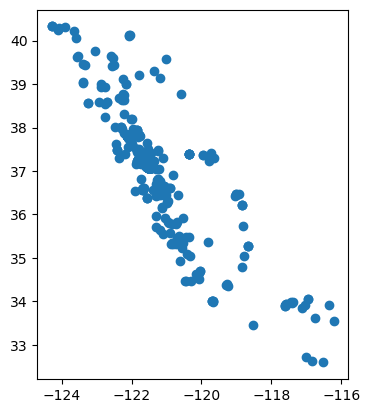

In [25]:
pigs_recent.plot()

### `metplotlib`'s `fig` and `ax`
We use `matplotlib` to create more complex, customized graphs. In particular, maps.
We can interact with `matplotlib` via its `pyplot` interface, which we imported as

```python
import matplotlib.pyplot as plt
```

Matplotlib graphs the data in a **figure** which cab have one or more **axes**.
The axis in *only* the area specifyed by the x-y axis and what is plotted in it.

To create a new blank figure:

Initialize a new figure and axes by calling pyplot’s `subplots()` function, and
show the graph using `plt.show()``:

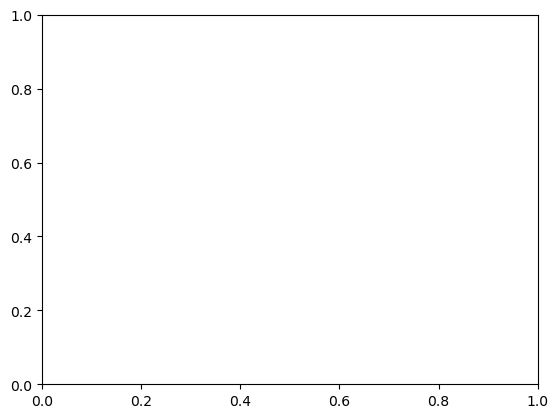

In [26]:
# create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()

## Adding a layer
When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. 
The general syntax to plot a datafram `df` onto an axis is:

```python
#create a new figure
fig, ax = plt.subplots()

#plot df on the ax axis
df.plot(ax=ax,
       ...) # other arguments for plot function

# display figure
plt.show()
```

**Example**
The first layer we want to add to our axis is the `pigs_recent` point data. We can plot our data using matplotlib like this:

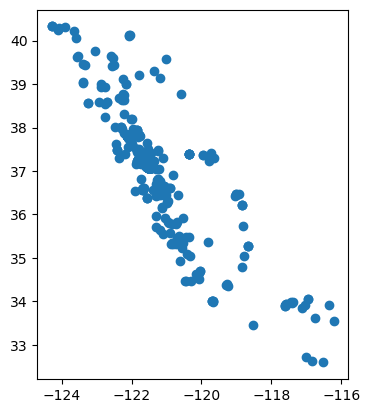

In [27]:
# create a new figure and axis
fig, ax= plt.subplots()

# add pigs point plot to our figures's axis
pigs_recent.plot(ax=ax)

#display figure
plt.show()

## Customization

Matplotlib allows for a lot of customization.
Some can be done directly in the `plot()` function (like we did with plotting pandas dataframe), while other is done by updating attributes from the axis as `ax`.

**Example**

Some basic customization for our pigs data could looke like this:

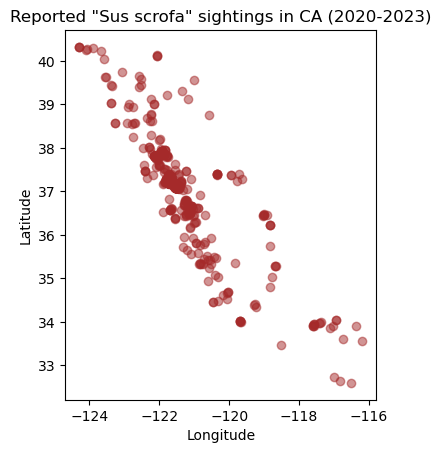

In [28]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

## Excercise
1. open the CA boundary shapefile and store as ca_boundary variable. How many features does it have? 
2. Add it to the pig sightings graph so that the CA boundary appears behind the points. 

In [32]:
ca_boundary=gpd.read_file('data/ca-boundary/ca-boundary.shp')
ca_boundary.head()

array([-124.48201686,   32.52883674, -114.13122248,   42.00950827])

In [38]:
# geom_type will show what kind of vector data is stored in each feature of the geometry column
ca_boundary.geom_type

0    MultiPolygon
dtype: object

In [39]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

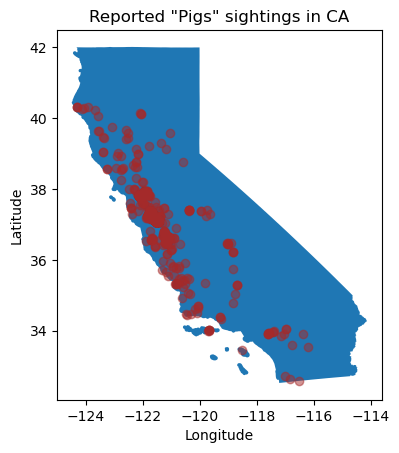

In [40]:
# create a new figure and axis
fig, ax= plt.subplots()

# add ca_boundary plot to our figures's axis
ca_boundary.plot(ax=ax)

# add pigs point plot to our figures's axis
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

# customization separate from the data plotting
ax.set_title('Reported "Pigs" sightings in CA')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#display figure
plt.show()